# MLP in Tensorflow
This book will contain an implementation of MLP in tensorflow to classify handwritten digits from mnist dataset.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/kirito/anaconda3/envs/tensorflow-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Fetching MNIST 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Displaying samples from MNIST 

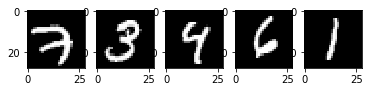

In [3]:
for index, image in enumerate(mnist.train.images[0:5]):
    plt.subplot(1,5,index+1)
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    plt.draw()

### Sizes of Input, Output and Hidden Layers 

In [4]:
n_inputs = 784
n_outputs = 10
n_hidden_1 = 256
n_hidden_2 = 256

### Input and Output Placeholders 

In [5]:
batch_x = tf.placeholder(dtype=tf.float32, shape=[None, n_inputs])
batch_y = tf.placeholder(dtype=tf.float32, shape=[None, n_outputs])

### Weights and Biases  

In [6]:
Wh1i = tf.Variable(tf.random_normal((n_inputs, n_hidden_1)), dtype=tf.float32)
bh1 = tf.Variable(tf.random_normal((1, n_hidden_1)), dtype=tf.float32)

Wh2h1 = tf.Variable(tf.random_normal((n_hidden_1, n_hidden_2)), dtype=tf.float32)
bh2 = tf.Variable(tf.random_normal((1, n_hidden_2)), dtype=tf.float32)

Woh2 = tf.Variable(tf.random_normal((n_hidden_2, n_outputs)), dtype=tf.float32)
bo = tf.Variable(tf.random_normal((1, n_outputs)))

### Tensor Operations
We are using ReLU as activation function and softmax at the final layer to get max probability.

In [7]:
zh1 = tf.add(tf.matmul(batch_x, Wh1i), bh1)
ah1 = tf.nn.relu(zh1)

zh2 = tf.add(tf.matmul(ah1, Wh2h1), bh2)
ah2 = tf.nn.relu(zh2)

zo = tf.add(tf.matmul(ah2, Woh2), bo)
ao = tf.nn.relu(zo)

In [8]:
logits = ao
prediction = tf.nn.softmax(ao)

In [9]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=batch_y))
train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss_op)

### Number of training_steps 

In [11]:
training_epochs = 50
display_step = 10
batch_size = 100

### Initialize variables 

In [12]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [25]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            x, y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([train_op, loss_op], feed_dict={batch_x: x, 
                                                         batch_y: y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
#     pred = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(batch_y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({batch_x: mnist.test.images, batch_y: mnist.test.labels}))
    save_path = saver.save(sess, "/tmp/model-mnist.ckpt")

Epoch: 0001 cost=2.322685078
Epoch: 0011 cost=1.863660375
Epoch: 0021 cost=1.831838106
Epoch: 0031 cost=1.813934533
Epoch: 0041 cost=1.802448757
Optimization Finished!
Accuracy: 0.5997


### Run predictions 

3
9
5
2
1


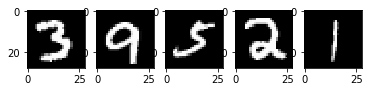

In [26]:
test_images = mnist.test.images[500:505]
test_labels = mnist.test.labels[500:505]
for idx, image in enumerate(test_images):
    image = np.reshape(image, (28, 28))
    print(np.argmax(test_labels[idx]))
    plt.subplot(1,5,idx+1)
    plt.imshow(image, cmap='gray')
    plt.draw()

In [27]:
with tf.Session() as sess:
    saver.restore(sess, "/tmp/model-mnist.ckpt")
    _logits = sess.run(logits, feed_dict={batch_x: test_images})
    _pred = tf.nn.softmax(_logits)
    predicted_number = tf.argmax(_pred, 1)
    _predicted_number = predicted_number.eval(feed_dict={batch_x: test_images})
    _actual_number = np.argmax(test_labels, 1)
    print('Predicted:',_predicted_number,'Actual:',_actual_number)

INFO:tensorflow:Restoring parameters from /tmp/model-mnist.ckpt
Predicted: [3 9 3 2 0] Actual: [3 9 5 2 1]
